In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from highlight_text import htext
import matplotlib as mpl

In [27]:
background = "#313332"
text_color = 'w'
primary = 'red'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

In [28]:
data = pd.read_csv('result.csv')

In [29]:
messi = 11119
riqui = 372827
fati = 382234
barca = 65
r_data = data[data["playerId"]==fati]
#r_data

In [30]:
xstart = []
ystart = []
xend = []
yend = []
names = ['x','y']

passes = r_data.loc[r_data['type/displayName'] == 'Pass'] # select rows based on condition
xstart = passes['x'].values #df -> np.array
ystart = passes['y'].values
    
df = pd.DataFrame(data=[xstart,ystart],index=names)
df = df.T

In [31]:
#df

In [32]:
def draw_field():
    #create basic lines
    plt.plot([0,0],[0,100],color='white')
    plt.plot([0,100],[0,0],color='white')
    plt.plot([100,0],[100,100],color='white')
    plt.plot([100,100],[0,100],color='white')
    plt.plot([50,50],[0,100],color='white')
    #right side box
    #inner
    plt.plot([94,94],[56,44],color='white')
    plt.plot([94,100],[56,56],color='white')
    plt.plot([94,100],[44,44],color='white')
    plt.scatter(88,50,color='white',s=10)

    #outer
    plt.plot([82,82],[72,28],color='white')
    plt.plot([82,100],[72,72],color='white')
    plt.plot([82,100],[28,28],color='white')

    #left side box
    #inner
    plt.plot([0,6],[56,56],color='white')
    plt.plot([0,6],[44,44],color='white')
    plt.plot([6,6],[56,44],color='white')
    plt.scatter(12,50,color='white',s=10)

    #Outer
    plt.plot([18,18],[72,28],color='white')
    plt.plot([0,18],[72,72],color='white')
    plt.plot([0,18],[28,28],color='white')
    
    #Middle
    mid = plt.Circle((50,50),9,color='white',fill=False,linewidth=2)
    midpoint= plt.Circle((50,50),1,color='white',fill=True)
    ax.add_artist(mid)
    ax.add_artist(midpoint)
    
    plt.axis('off')

Code to create the passing heatmaps

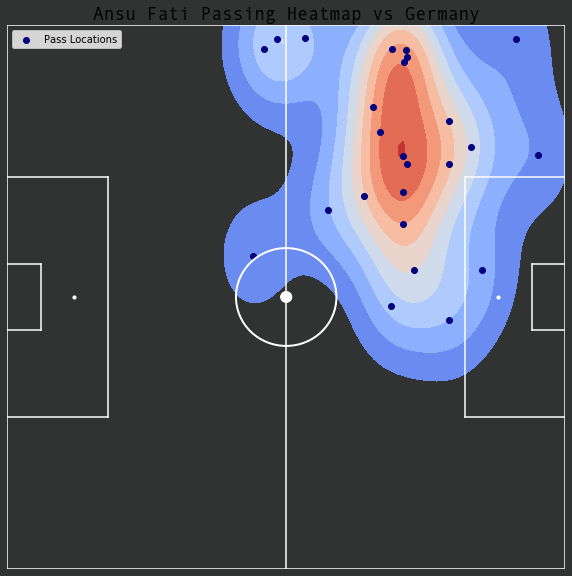

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

kde = sns.kdeplot(xstart,
            ystart,
            shade=True,
            cmap = 'coolwarm',
            shade_lowest=False
            )

draw_field()
plt.scatter(df['x'], df['y'], color='navy',label='Pass Locations') #you can pass arrays and dataframes here
    
plt.title('Ansu Fati Passing Heatmap vs Germany',fontname='Andale Mono',fontsize=18)
plt.axis('off')
plt.ylim(0, 100) # need this, otherwise plot will go outside
plt.xlim(0, 100)
plt.legend()

#plt.savefig('riqui2.png', dpi=300)

# Code to create xG flow

In [8]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match

Please enter the match id: 12335


In [9]:
res = requests.get(url)
soup = BeautifulSoup(res.content, "lxml")
scripts = soup.find_all('script')

In [10]:
string_with_json_obj = '' 
# Find data for teams 
for el in scripts: 
    if 'shotsData' in el.text: 
        string_with_json_obj = el.text.strip()
#print(string_with_json_obj)

# strip unnecessary symbols and get only JSON data 
ind_start = string_with_json_obj.index("('")+2 
ind_end = string_with_json_obj.index("')") 
json_data = string_with_json_obj[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data) 

In [11]:
#Create Dataframe
x_under = []
y_under = []
min_under = []
result_under = []
xG_under = []
player_under = []
team_under = []
dataa = data['a']
datah = data['h']
names = ['x','y','minute','team','xG','player','result']

for index in range(len(datah)):
    for key in datah[index]:
        if key == 'X':
            x_under.append(datah[index][key])
        if key == 'Y':
            y_under.append(datah[index][key])
        if key == 'minute':
            min_under.append(datah[index][key])
        if key == 'h_team':
            team_under.append(datah[index][key])
        if key == 'xG':
            xG_under.append(datah[index][key])
        if key == 'player':
            player_under.append(datah[index][key])
        if key == 'result':
            result_under.append(datah[index][key])
            
for index in range(len(dataa)):
    for key in dataa[index]:
        if key == 'X':
            x_under.append(1 - float(dataa[index][key]))
        if key == 'Y':
            y_under.append(1 - float(dataa[index][key]))
        if key == 'minute':
            min_under.append(dataa[index][key])
        if key == 'a_team':
            team_under.append(dataa[index][key])
        if key == 'xG':
            xG_under.append(dataa[index][key])
        if key == 'player':
            player_under.append(dataa[index][key])
        if key == 'result':
            result_under.append(dataa[index][key])
            


In [12]:
df2 = pd.DataFrame([x_under,y_under,min_under,team_under,xG_under,player_under,result_under],index=names)
df2 = df2.T

df2['x'] = pd.to_numeric(df2['x'])
df2['y'] = pd.to_numeric(df2['y'])
df2['xG'] = pd.to_numeric(df2['xG'])
df2['minute'] = pd.to_numeric(df2['minute'])

df2['x'] = df2['x']*100
df2['y'] = df2['y']*100

hteam = df2['team'].iloc[0]
ateam = df2['team'].iloc[-1]

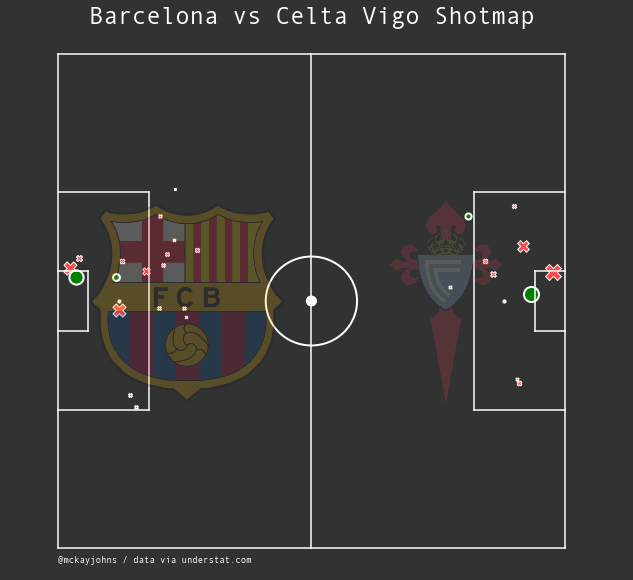

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#create the field
draw_field()


#plot scatter points
for x in range(len(df2['x'])):
    if df2['team'][x] == ateam:
        if df2['result'][x] == 'Goal': 
            plt.scatter(df2['x'][x],df2['y'][x], color = 'green',s=df2['xG'][x]*400,edgecolor='white',linewidth=2)       
        else:
            plt.scatter(df2['x'][x],df2['y'][x], color = '#ff4d4d',s=df2['xG'][x]*400,edgecolor='white',marker='X')
            
    if df2['team'][x] == hteam:
        if df2['result'][x] == 'Goal': 
            plt.scatter(df2['x'][x],df2['y'][x], color = 'green',s=df2['xG'][x]*400,edgecolor='white',linewidth=2)
        else:
            plt.scatter(df2['x'][x],df2['y'][x], color = '#ff4d4d',s=df2['xG'][x]*400,edgecolor='white',marker='X')

plt.title((f"{ateam} vs {hteam} Shotmap"),fontname='Andale Mono',fontsize=24,color=text_color)
            
#add away logo
ax2=fig.add_axes([.09,.25,.5,.5])
ax2.axis('off')
url = "https://logos-world.net/wp-content/uploads/2020/04/Barcelona-Logo-700x394.png"
response = requests.get(url)
img=Image.open(BytesIO(response.content))
ax2.imshow(img,zorder=1,alpha = .2)

#add home logo
ax2=fig.add_axes([.45,.25,.5,.5])
ax2.axis('off')
url = "https://2.bp.blogspot.com/-d3PF3oKhFvo/U-8sYEKuvYI/AAAAAAAADaU/ehEDq3073pE/s1600/Logo%2BCelta%2Bde%2BVigo.png"
response = requests.get(url)
img=Image.open(BytesIO(response.content))
ax2.imshow(img,zorder=1,alpha = .2)



#add credentials
fig.text(.16,.14,'@mckayjohns / data via understat.com',fontstyle='italic',fontsize=9,fontfamily='Andale Mono',color=text_color)


plt.savefig('test.png',dpi=300,bbox_inches = 'tight',facecolor=background)


In [14]:
a_xG = []
h_xG = []
a_min = []
h_min = []

for x in range(len(df2['xG'])):
    if df2['team'][x] == ateam:
        a_xG.append(df2['xG'][x])
        a_min.append(df2['minute'][x])
    if df2['team'][x] == hteam:
        h_xG.append(df2['xG'][x])
        h_min.append(df2['minute'][x])
    
def nums_cumulative_sum(nums_list):
  return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

acum = nums_cumulative_sum(a_xG)
hcum = nums_cumulative_sum(h_xG)

/Users/mckayjohns/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


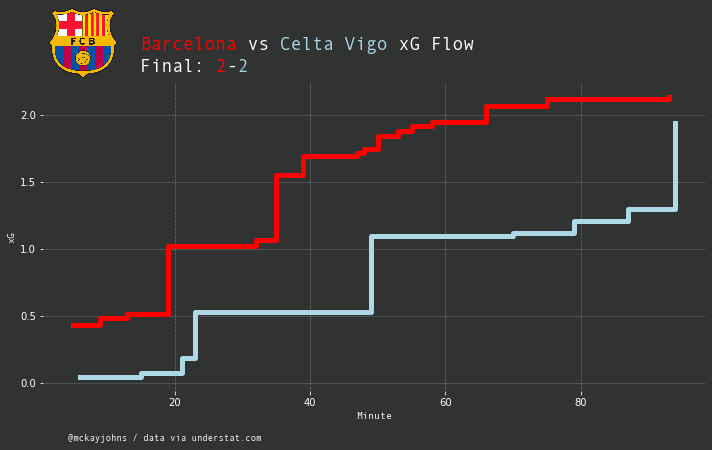

In [26]:
#create figure and axes
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#adding a grid
ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='both',zorder=1)

#plt.xticks([0,15,30,45,60,75,90])        
plt.xlabel('Minute',fontname='Andale Mono',color=text_color)
plt.ylabel('xG',fontname='Andale Mono',color=text_color)

spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

ax.step(a_min,acum,color='r',label=ateam,linewidth=5,where='post')
ax.step(h_min,hcum,color='lightblue',label=hteam,linewidth=5,where='post')


s = "<{}> vs <{}> xG Flow\nFinal: <2>-<2>"
htext.fig_htext(s.format(ateam,hteam),
                x=.2,y=.99,
                highlight_weights=['bold'],
                string_weight='bold',
                fontsize=18,
                fontfamily='Andale Mono',
                color=text_color,
                highlight_colors=[primary,secondary,primary,secondary])

#add logo
ax2=fig.add_axes([.02,.98,.2,.2])
ax2.axis('off')
url = "https://logos-world.net/wp-content/uploads/2020/04/Barcelona-Logo-700x394.png"
response = requests.get(url)
img=Image.open(BytesIO(response.content))
ax2.imshow(img)

#add credentials
fig.text(.1,-.025,"@mckayjohns / data via understat.com",fontstyle='italic',fontsize=9,fontfamily='Andale Mono',color=text_color)

plt.tight_layout()
plt.savefig('xgflow.png',dpi=300,bbox_inches = 'tight',facecolor=background)